In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housedata/output.csv
/kaggle/input/housedata/data.csv
/kaggle/input/housedata/data.dat


In [2]:
data=pd.read_csv('/kaggle/input/housedata/data.csv')

In [3]:
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
df=data.copy()

# Multiple linear multiple

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### Exploratory data analysis

In [7]:
df.shape

(4600, 18)

In [8]:
df.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [9]:
df.dtypes.value_counts()

int64      9
object     5
float64    4
Name: count, dtype: int64

In [10]:
df.isna()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4596,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4597,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4598,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

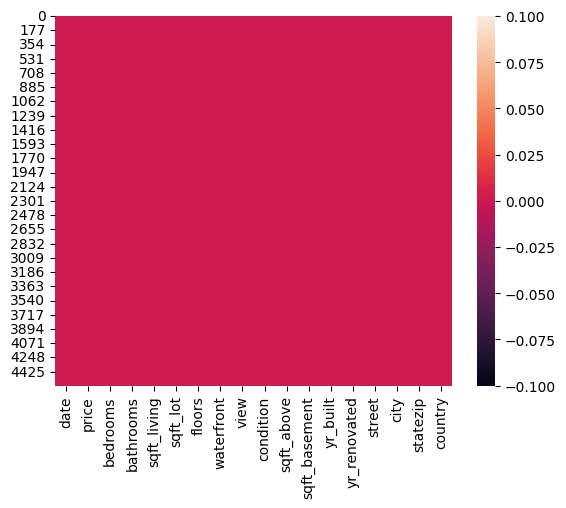

In [11]:
sns.heatmap(df.isna())

/tmp/ipykernel_33/1866581662.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Density'>

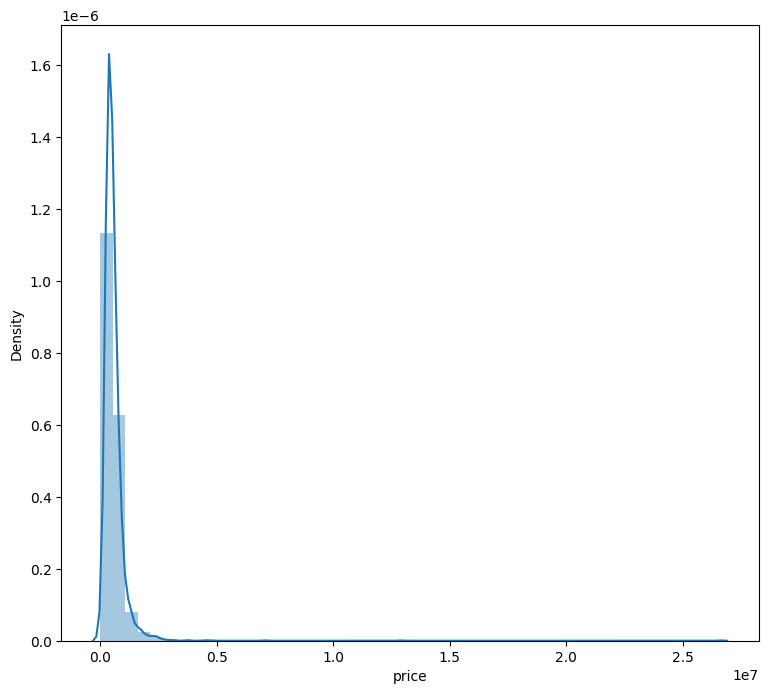

In [12]:
plt.figure(figsize=(9,8))
sns.distplot(df['price'])

In [13]:
mean = df['price'].mean()
median = df['price'].median()
std_dev = df['price'].std()

print(f"Moyenne: {mean}\nMédiane: {median}\nÉcart-type: {std_dev}")

Moyenne: 551962.9884732141
Médiane: 460943.46153850004
Écart-type: 563834.7025471414


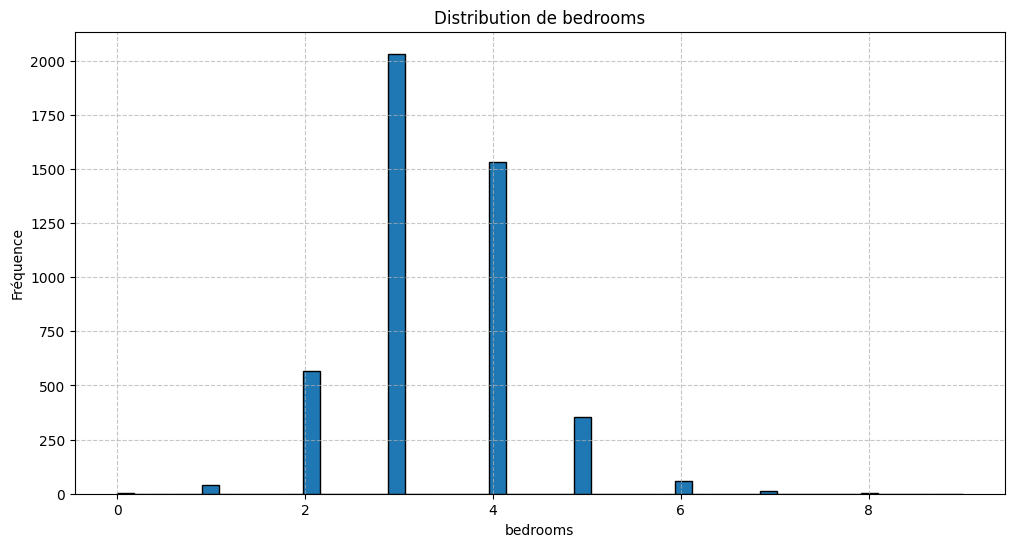

In [14]:
column_name = 'bedrooms'
plt.figure(figsize=(12, 6))
plt.hist(df[column_name], bins=50, edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

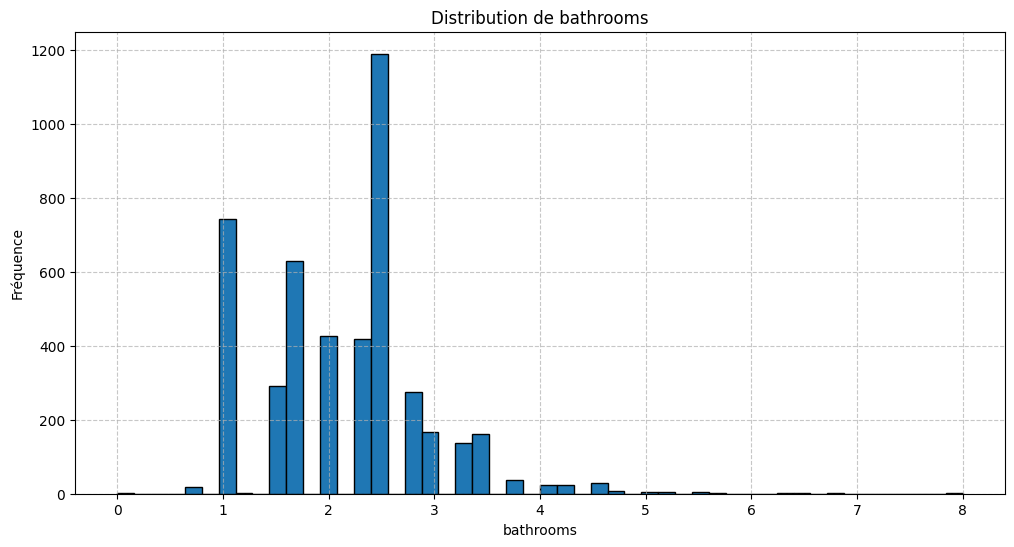

In [15]:
column_name = 'bathrooms'
plt.figure(figsize=(12, 6))
plt.hist(df[column_name], bins=50, edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

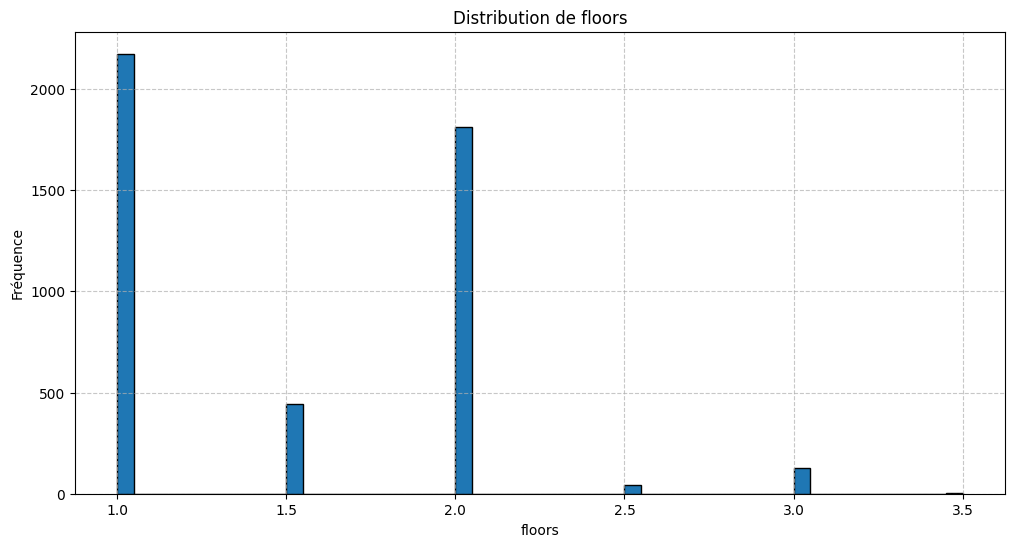

In [17]:
column_name = 'floors'
plt.figure(figsize=(12, 6))
plt.hist(df[column_name], bins=50, edgecolor='black')
plt.title(f'Distribution de {column_name}')
plt.xlabel(column_name)
plt.ylabel('Fréquence')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Data preprocessing

In [6]:
df=df.drop('date',axis=1)

In [7]:
X=df.drop('price',axis=1)
Y=df['price']

In [8]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, test_size=0.2)


In [9]:
columns_to_encode=['street','city','statezip','country']

In [23]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(handle_unknown='ignore',sparse=False)
encoded_data=encoder.fit_transform(X_train[columns_to_encode])

#creating an encoded dataframe with the initial column name 
encoded_df = pd.DataFrame(encoded_data, columns=[f"{col}_{value}" for col in columns_to_encode for value in X_train[col].unique()],index=X_train.index)

# concatenating original dataframe with encoded df 
result_data_X_train=pd.concat([X_train.drop(columns_to_encode,axis=1),encoded_df],axis=1)



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


<Axes: >

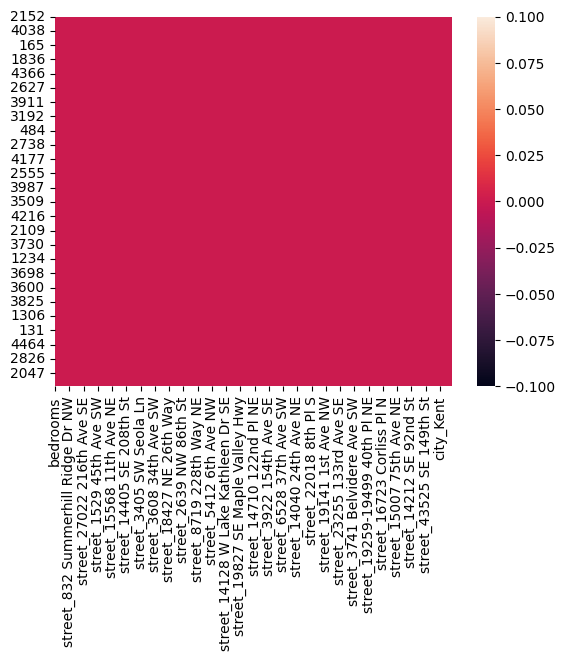

In [24]:
sns.heatmap(result_data_X_train.isna())

In [25]:
encoded_df.shape

(3680, 3748)

In [26]:
X_train.shape

(3680, 16)

In [27]:
result_data_X_train.shape

(3680, 3760)

In [28]:
result_data_X_train.dtypes.value_counts()

float64    3751
int64         9
Name: count, dtype: int64

In [29]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(result_data_X_train)


In [17]:
X_train_scaled.shape

(3680, 3760)

In [19]:
X_train_scaled

array([[ 0.66032227, -0.52278496,  0.34227573, ..., -0.02331896,
        -0.01648675,  0.        ],
       [ 0.66032227, -0.20610205, -0.47441554, ..., -0.02331896,
        -0.01648675,  0.        ],
       [ 1.76788195,  5.17750733,  6.75175151, ..., -0.02331896,
        -0.01648675,  0.        ],
       ...,
       [ 0.66032227, -1.47283367, -0.75353788, ..., -0.02331896,
        -0.01648675,  0.        ],
       [ 0.66032227,  1.06062957,  0.4663301 , ..., -0.02331896,
        -0.01648675,  0.        ],
       [-0.44723741, -0.52278496,  0.08382912, ..., -0.02331896,
        -0.01648675,  0.        ]])

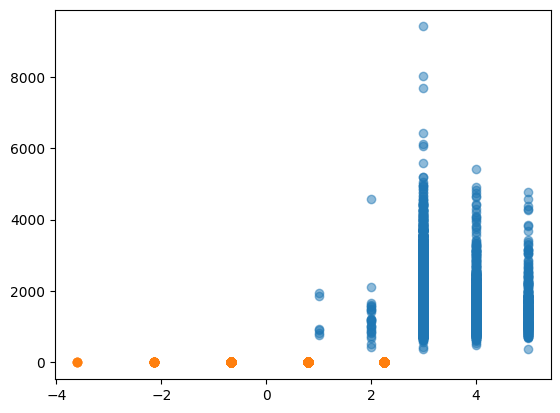

In [25]:
plt.scatter(result_data_X_train.iloc[:,7], result_data_X_train.iloc[:,8], alpha=0.5, label='origine')
plt.scatter(X_train_scaled[:,7], X_train_scaled[:,8], alpha=0.5, label='normalisé')

## Entrainement du modèle

In [30]:
model = LinearRegression()
model.fit(X_train_scaled, Y_train)

LinearRegression()

### Evaluation du modèle

In [39]:
encoded_data_test=encoder.transform(X_test[columns_to_encode])
encoded_df = pd.DataFrame(encoded_data_test, columns=[f"{col}_{value}" for col in columns_to_encode for value in X_train[col].unique()],index=X_test.index)
result_data_X_test=pd.concat([X_test.drop(columns_to_encode,axis=1),encoded_df],axis=1)

X_test_scaled=scaler.transform(result_data_X_test)


In [37]:
encoded_data_test.shape

(920, 3748)

In [36]:
encoded_df.shape

(920, 3748)

In [40]:
X_test_scaled.shape

(920, 3760)

In [41]:
Y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 6926490398798652802618812718475378688.00
RMSE: 2631822638172765184.00
R² Score: -39472326629006957795606528.00


### Analyse des résultat 

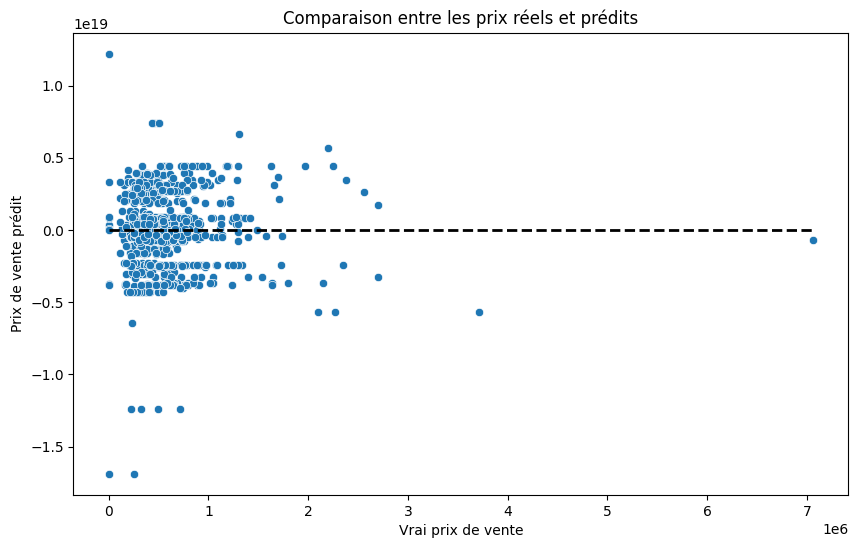

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)
plt.xlabel('Vrai prix de vente')
plt.ylabel('Prix de vente prédit')
plt.title('Comparaison entre les prix réels et prédits')
plt.show()